In [2]:
# This program uses RNN(LSTM)
#STOCK PRICE PREDICTION using data of past 60 days for a company.
!pip3 install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
key='32c58d3a1b6d4a6c07036111ff399df23a5e70f8'
df=web.get_data_tiingo('TWTR', api_key=key)

C:\Users\anshu\anaconda3\envs\tf\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [9]:
df.to_csv('TWTR.csv')
df=pd.read_csv('TWTR.csv')

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TWTR,2018-06-26 00:00:00+00:00,44.84,45.32,43.51,44.36,20194074,44.84,45.32,43.51,44.36,20194074,0.0,1.0
1,TWTR,2018-06-27 00:00:00+00:00,43.70,46.22,43.68,45.50,25844604,43.70,46.22,43.68,45.50,25844604,0.0,1.0
2,TWTR,2018-06-28 00:00:00+00:00,44.79,44.84,42.49,43.65,18911179,44.79,44.84,42.49,43.65,18911179,0.0,1.0
3,TWTR,2018-06-29 00:00:00+00:00,43.67,45.20,43.56,45.05,24392892,43.67,45.20,43.56,45.05,24392892,0.0,1.0
4,TWTR,2018-07-02 00:00:00+00:00,44.98,45.00,42.75,43.06,16703638,44.98,45.00,42.75,43.06,16703638,0.0,1.0


In [12]:
df.shape

(1095, 14)

In [13]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1090,TWTR,2022-10-24 00:00:00+00:00,51.52,51.86,50.52,50.71,22987553,51.52,51.86,50.52,50.71,22987553,0.0,1.0
1091,TWTR,2022-10-25 00:00:00+00:00,52.78,53.18,52.20,52.40,35077848,52.78,53.18,52.20,52.40,35077848,0.0,1.0
1092,TWTR,2022-10-26 00:00:00+00:00,53.35,53.50,52.77,52.95,28064973,53.35,53.50,52.77,52.95,28064973,0.0,1.0
1093,TWTR,2022-10-27 00:00:00+00:00,53.70,54.00,53.70,53.91,140831508,53.70,54.00,53.70,53.91,140831508,0.0,1.0
1094,TWTR,2022-10-28 00:00:00+00:00,53.70,53.70,53.70,53.70,0,53.70,53.70,53.70,53.70,0,0.0,1.0


In [15]:
df_1 = df.reset_index()['close']

In [16]:
df_1.shape

(1095,)

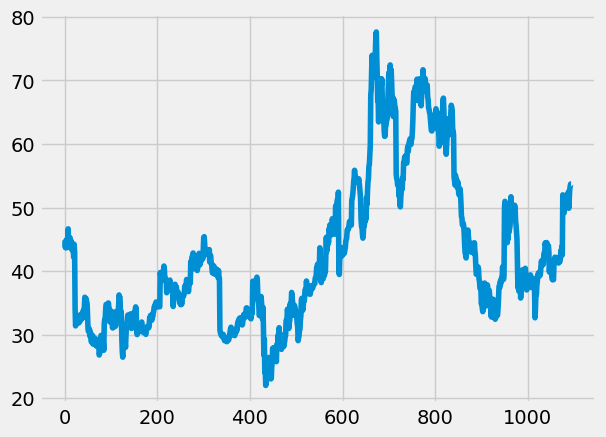

In [17]:
plt.plot(df_1)

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(np.array(df_1).reshape(-1,1))

In [19]:
df_1.shape

(1095, 1)

In [22]:
training_set = int(len(df_1)*0.70)
test_set=len(df_1)-training_set
train_data,test_data=df_1[0:training_set,:],df_1[training_set:len(df_1),:1]

In [23]:
training_set,test_set

(766, 329)

In [25]:
train_data

array([[0.41056984],
       [0.3900773 ],
       [0.40967104],
       [0.38953802],
       [0.41308646],
       [0.39349272],
       [0.41452454],
       [0.44310624],
       [0.3979867 ],
       [0.39097609],
       [0.3931332 ],
       [0.41811972],
       [0.40427827],
       [0.40014381],
       [0.40823297],
       [0.38360597],
       [0.38540356],
       [0.38504404],
       [0.38306669],
       [0.36257415],
       [0.39942477],
       [0.3764156 ],
       [0.21786806],
       [0.16861406],
       [0.17742225],
       [0.17814129],
       [0.19449937],
       [0.17904009],
       [0.19737552],
       [0.19180298],
       [0.17688298],
       [0.17904009],
       [0.17993888],
       [0.19413985],
       [0.20115046],
       [0.18658997],
       [0.19467913],
       [0.19288154],
       [0.19054467],
       [0.21013841],
       [0.21229552],
       [0.21355384],
       [0.2207442 ],
       [0.24968542],
       [0.24249506],
       [0.23997843],
       [0.24519144],
       [0.236

In [29]:
def preprocessing(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [31]:
time_step=100
X_train,y_train = preprocessing(train_data,time_step)
X_test,y_test= preprocessing(test_data, time_step)

In [35]:
print(X_train.shape)
print(y_train.shape)

(665, 100)
(665,)


In [36]:
print(X_test.shape)
print(y_test.shape)

(228, 100)
(228,)


In [37]:
#creating LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100, batch_size=64, verbose=1)

Epoch 1/100
11/11 [==============================] - 26s 809ms/step - loss: 0.0546 - val_loss: 0.0058
Epoch 2/100
11/11 [==============================] - 5s 413ms/step - loss: 0.0149 - val_loss: 0.0072
Epoch 3/100
11/11 [==============================] - 5s 494ms/step - loss: 0.0081 - val_loss: 0.0053
Epoch 4/100
11/11 [==============================] - 5s 424ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 5/100
11/11 [==============================] - 4s 378ms/step - loss: 0.0061 - val_loss: 0.0051
Epoch 6/100
11/11 [==============================] - 5s 423ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 7/100
11/11 [==============================] - 5s 458ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 8/100
11/11 [==============================] - 4s 393ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 9/100
11/11 [==============================] - 4s 410ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 10/100
11/11 [==============================] - 5s 434ms/step - loss: 0.0048 - val_l

In [42]:
import tensorflow as tf

In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 1s 85ms/step


In [44]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


42.68480709628493

In [46]:
math.sqrt(mean_squared_error(y_test,test_predict))

41.413791464461944

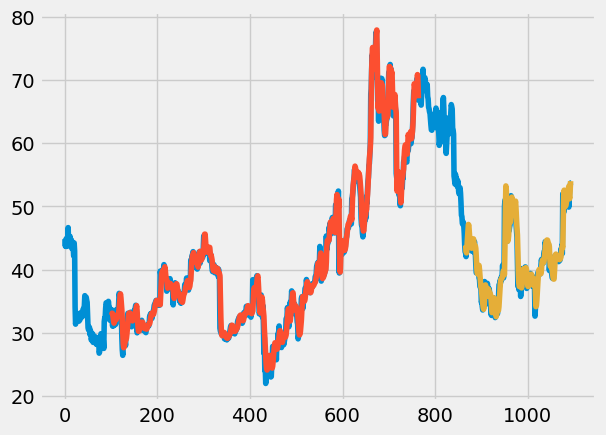

In [47]:
look_back=100
trainPredictPlot = np.empty_like(df_1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(df_1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df_1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [48]:
len(test_data)

329

In [49]:
x_input=test_data[229:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.58882105]
101
1 day input [0.31511774 0.30523099 0.27017796 0.27359338 0.28743484 0.27611001
 0.2836599  0.30397268 0.29714183 0.29983822 0.31296063 0.30900593
 0.30181557 0.28401941 0.27664929 0.29174906 0.29444544 0.29138954
 0.30181557 0.26622326 0.19144347 0.2167895  0.26514471 0.25687579
 0.28294086 0.29498472 0.31439871 0.31637606 0.31493798 0.32069028
 0.30990473 0.31170232 0.32087003 0.33956498 0.35250764 0.33956498
 0.34118282 0.34154233 0.34262089 0.36886572 0.3764156  0.37443825
 0.40319971 0.39439152 0.40014381 0.40445803 0.40266044 0.39529031
 0.39295344 0.39529031 0.37767392 0.32104979 0.33776739 0.34244113
 0.33183534 0.32428546 0.3113428  0.30109653 0.29875966 0.29893942
 0.29929894 0.34513752 0.35682186 0.36293367 0.34891246 0.35484451
 0.35772065 0.36203487 0.34963149 0.35340644 0.35376595 0.34639583
 0.3487327  0.35196836 0.35088981 0.36113608 0.38198814 0.37282042
 0.39259392 0.36922524 0.53927737 0.52669423 0.49236024 0.4885853
 0.50979687 0.50458386 0.50224699 

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
len(df_1)

1095

In [56]:
df_2=df_1.tolist()
df_2.extend(lst_output)

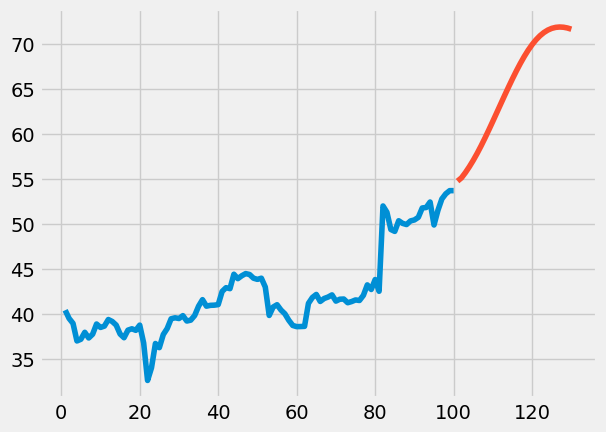

In [67]:
plt.plot(day_new,scaler.inverse_transform(df_1[995:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

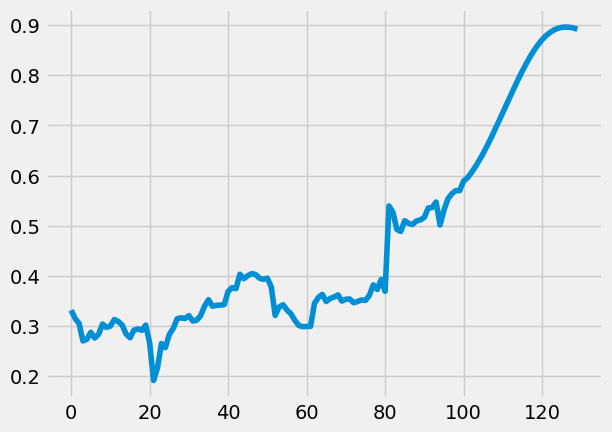

In [68]:
df_3=df_1.tolist()
df_3.extend(lst_output)
plt.plot(df_3[995:])